### Student Information
Name: Hung-Ting Hsieh (謝弘廷)

Student ID: 110704054

GitHub ID: Kevindic0214

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here

### Second Section: Emplement the new dataset

## 1. Data Preparation

In [2]:
from datasets import load_dataset

# Load the YouTube sentiment analysis dataset
ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

In [3]:
ds['train'].features

{'sentiment': Value(dtype='string', id=None),
 'comment': Value(dtype='string', id=None)}

In [4]:
# Display the first record in the training set to ensure data is loaded correctly
print(ds['train'][0])

{'sentiment': 'not nostalgia', 'comment': 'He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.'}


In [5]:
# Check the unique sentiment labels 'nostalgia' and 'not nostalgia'
print(set(ds['train']['sentiment']))

{'nostalgia', 'not nostalgia'}


In [6]:
# Check the total number of rows in the training set
print(f"Total number of rows in the training set: {len(ds['train'])}")

Total number of rows in the training set: 1500


In [7]:
# Check the column names in the dataset
print(f"Columns in the dataset: {ds['train'].column_names}")

Columns in the dataset: ['sentiment', 'comment']


In [8]:
# Display the first comment and its corresponding sentiment label
print(ds['train']['comment'][0])  # Display the first comment
print(ds['train']['sentiment'][0])  # Display the corresponding sentiment label

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
not nostalgia


In [9]:
# Get the distribution of sentiment labels
sentiment_distribution = ds['train'].to_pandas()['sentiment'].value_counts()
print(sentiment_distribution)

sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe

In [10]:
import pandas as pd

# Convert the dataset from dictionary format to pandas DataFrame
df_youtube = pd.DataFrame({
    'comment': ds['train']['comment'],  # Extract the comments
    'sentiment': ds['train']['sentiment']  # Extract the sentiment labels
})

# Display the first few rows of the DataFrame to ensure the conversion is successful
print(df_youtube.head())

                                             comment      sentiment
0  He was a singer with a golden voice that I lov...  not nostalgia
1  The mist beautiful voice ever I listened to hi...      nostalgia
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia
4  listening to his songs reminds me of my mum wh...      nostalgia


In [11]:
# Display the structure of the DataFrame
print(df_youtube.info())

# Check the distribution of sentiment labels again to ensure data is correct
print(df_youtube['sentiment'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comment    1500 non-null   object
 1   sentiment  1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB
None
sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


In [12]:
# Add sentiment column to the DataFrame (this will be the numerical label)
df_youtube['sentiment_numeric'] = df_youtube['sentiment'].apply(lambda x: 1 if x == 'nostalgia' else 0)

# Display the first 10 rows to check the result
print(df_youtube.head(10))

                                             comment      sentiment  \
0  He was a singer with a golden voice that I lov...  not nostalgia   
1  The mist beautiful voice ever I listened to hi...      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia   
4  listening to his songs reminds me of my mum wh...      nostalgia   
5  Every time I heard this song as a child, I use...      nostalgia   
6  My dad loved listening to Jim Reeves, when I w...      nostalgia   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia   
8           Wherever you  are you always in my heart  not nostalgia   
9  Elvis will always be number one no one can com...  not nostalgia   

   sentiment_numeric  
0                  0  
1                  1  
2                  1  
3                  0  
4                  1  
5                  1  
6                  1  
7                  1  
8          

In [13]:
def format_labels(target, docs):
    """ Format the numerical labels to textual labels """
    return 'nostalgia' if target == 1 else 'not nostalgia'

# Apply the format_labels function to add a formatted label column
df_youtube['sentiment_label'] = df_youtube['sentiment_numeric'].apply(lambda t: format_labels(t, df_youtube))

# Display the first 10 rows to see the final DataFrame
print(df_youtube.head(10))

                                             comment      sentiment  \
0  He was a singer with a golden voice that I lov...  not nostalgia   
1  The mist beautiful voice ever I listened to hi...      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia   
4  listening to his songs reminds me of my mum wh...      nostalgia   
5  Every time I heard this song as a child, I use...      nostalgia   
6  My dad loved listening to Jim Reeves, when I w...      nostalgia   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia   
8           Wherever you  are you always in my heart  not nostalgia   
9  Elvis will always be number one no one can com...  not nostalgia   

   sentiment_numeric sentiment_label  
0                  0   not nostalgia  
1                  1       nostalgia  
2                  1       nostalgia  
3                  0   not nostalgia  
4                  1   

In [14]:
# Drop the original 'sentiment' column
df_youtube = df_youtube.drop(columns=['sentiment'])

# Display the updated DataFrame to ensure the column is removed
print(df_youtube.head(10))

                                             comment  sentiment_numeric  \
0  He was a singer with a golden voice that I lov...                  0   
1  The mist beautiful voice ever I listened to hi...                  1   
2  I have most of Mr. Reeves songs.  Always love ...                  1   
3  30 day leave from 1st tour in Viet Nam to conv...                  0   
4  listening to his songs reminds me of my mum wh...                  1   
5  Every time I heard this song as a child, I use...                  1   
6  My dad loved listening to Jim Reeves, when I w...                  1   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...                  1   
8           Wherever you  are you always in my heart                  0   
9  Elvis will always be number one no one can com...                  0   

  sentiment_label  
0   not nostalgia  
1       nostalgia  
2       nostalgia  
3   not nostalgia  
4       nostalgia  
5       nostalgia  
6       nostalgia  
7       nostal

In [15]:
df_youtube[:10][["comment", "sentiment_label"]]

,comment,sentiment_label
0,He was a singer with a golden voice that I lov...,not nostalgia
1,The mist beautiful voice ever I listened to hi...,nostalgia
2,I have most of Mr. Reeves songs. Always love ...,nostalgia
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia
4,listening to his songs reminds me of my mum wh...,nostalgia
5,"Every time I heard this song as a child, I use...",nostalgia
6,"My dad loved listening to Jim Reeves, when I w...",nostalgia
7,i HAVE ALSO LISTENED TO Jim Reeves since child...,nostalgia
8,Wherever you are you always in my heart,not nostalgia
9,Elvis will always be number one no one can com...,not nostalgia


In [16]:
df_youtube.loc[:10, 'comment']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: comment, dtype: object

In [17]:
df_youtube.iloc[:10, 0]

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
5    Every time I heard this song as a child, I use...
6    My dad loved listening to Jim Reeves, when I w...
7    i HAVE ALSO LISTENED TO Jim Reeves since child...
8             Wherever you  are you always in my heart
9    Elvis will always be number one no one can com...
Name: comment, dtype: object

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [18]:
# Check for missing values in the DataFrame
missing_values = df_youtube.isnull().sum()

# Display the missing values for each column
print(missing_values)

comment              0
sentiment_numeric    0
sentiment_label      0
dtype: int64


In [19]:
import helpers.data_mining_helpers as dmh
df_youtube.isnull().apply(lambda x: dmh.check_missing_values(x))

,comment,sentiment_numeric,sentiment_label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [20]:
# Exercise 4
# Answer here
import helpers.data_mining_helpers as dmh
df_youtube.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

### 4.2 Dealing with Duplicate Data

In [21]:
df_youtube.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [22]:
sum(df_youtube.duplicated())

1

In [23]:
sum(df_youtube.duplicated('comment'))

1

In [24]:
# Find all duplicated rows, including the first occurrence
duplicated_all = df_youtube[df_youtube.duplicated(keep=False)]

# Display all duplicated rows
print(duplicated_all)

                                              comment  sentiment_numeric  \
62  never heard this song before... WOW What an am...                  0   
78  never heard this song before... WOW What an am...                  0   

   sentiment_label  
62   not nostalgia  
78   not nostalgia  


In [25]:
# Remove duplicated rows, keep the first occurrence
df_youtube_cleaned = df_youtube.drop_duplicates()

# Display the cleaned DataFrame
print(df_youtube_cleaned)

                                                comment  sentiment_numeric  \
0     He was a singer with a golden voice that I lov...                  0   
1     The mist beautiful voice ever I listened to hi...                  1   
2     I have most of Mr. Reeves songs.  Always love ...                  1   
3     30 day leave from 1st tour in Viet Nam to conv...                  0   
4     listening to his songs reminds me of my mum wh...                  1   
...                                                 ...                ...   
1495  i don't know!..but the opening of the video,.....                  0   
1496  it's sad this is such a beautiful song when yo...                  0   
1497  Dear Friend, I think age and time is not that ...                  0   
1498  I was born in 1954 and started to be aware of ...                  1   
1499  This is the first CD I bought after my marriag...                  1   

     sentiment_label  
0      not nostalgia  
1          nostal

## 5. Data Preprocessing

### 5.1 Sampling

In [26]:
# Randomly sample 1000 rows
sampled_youtube = df_youtube.sample(n=1000, random_state=42)

# Display the sampled data
print(sampled_youtube.head())

                                                comment  sentiment_numeric  \
1116  Perception of death, birth, sorrow, suffering,...                  0   
1368  One of those Classic (and there were so many o...                  0   
422             So many memories in each and every song                  1   
413   Was it in 1968 when Engelbert released it?  I ...                  1   
451   OMG talk about take a trip down memory lane ho...                  1   

     sentiment_label  
1116   not nostalgia  
1368   not nostalgia  
422        nostalgia  
413        nostalgia  
451        nostalgia  


In [27]:
sampled_youtube[:4]

,comment,sentiment_numeric,sentiment_label
1116,"Perception of death, birth, sorrow, suffering,...",0,not nostalgia
1368,One of those Classic (and there were so many o...,0,not nostalgia
422,So many memories in each and every song,1,nostalgia
413,Was it in 1968 when Engelbert released it? I ...,1,nostalgia


sentiment_label
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


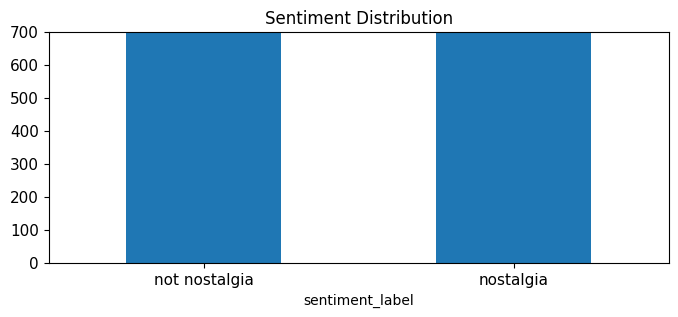

In [28]:
import matplotlib.pyplot as plt

# Count the occurrence of each sentiment label
sentiment_counts = df_youtube['sentiment_label'].value_counts()
print(sentiment_counts)

# Plot barchart for sentiment counts
sentiment_counts.plot(kind='bar', 
                      title='Sentiment Distribution', 
                      ylim=[0, 700], 
                      rot=0, fontsize=11, figsize=(8, 3))

# Show the plot
plt.show()

sentiment_label
nostalgia        507
not nostalgia    493
Name: count, dtype: int64


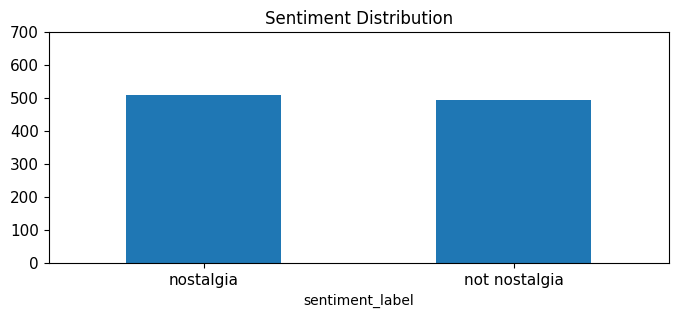

In [29]:
import matplotlib.pyplot as plt

# Count the occurrence of each sentiment label
sentiment_counts = sampled_youtube['sentiment_label'].value_counts()
print(sentiment_counts)

# Plot barchart for sentiment counts
sentiment_counts.plot(kind='bar', 
                      title='Sentiment Distribution', 
                      ylim=[0, 700], 
                      rot=0, fontsize=11, figsize=(8, 3))

# Show the plot
plt.show()

### >>> **Exercise 8 (take home):** 

In [30]:
# Calculate the sentiment distribution for the full dataset
sentiment_counts_full = df_youtube['sentiment_label'].value_counts()

# Calculate the sentiment distribution for the sampled dataset
sentiment_counts_sampled = sampled_youtube['sentiment_label'].value_counts()

In [31]:
import pandas as pd

# Create a DataFrame that contains both distributions
comparison_df = pd.DataFrame({
    'Full Dataset': sentiment_counts_full,
    'Sampled Dataset': sentiment_counts_sampled
})

# Fill missing values with 0 (in case some labels are missing in the sampled dataset)
comparison_df = comparison_df.fillna(0)

# Display the comparison DataFrame (optional, to check the structure)
print(comparison_df)

                 Full Dataset  Sampled Dataset
sentiment_label                               
nostalgia                 750              507
not nostalgia             750              493


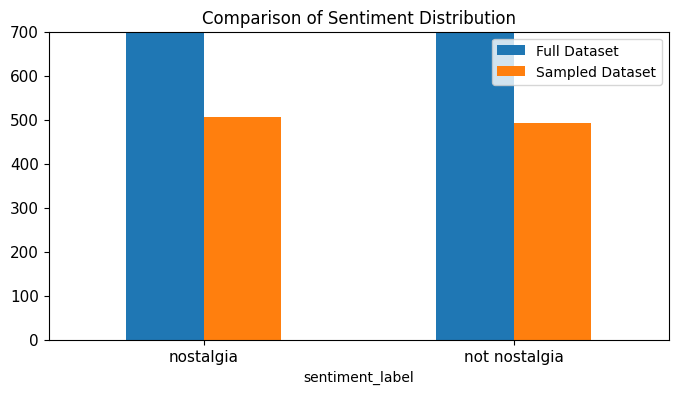

In [32]:
import matplotlib.pyplot as plt

# Plot side-by-side bar chart
comparison_df.plot(kind='bar', 
                   title='Comparison of Sentiment Distribution',
                   ylim=[0, 700], 
                   rot=0, fontsize=11, figsize=(8, 4))

# Show the plot
plt.show()

In [33]:
import nltk
nltk.download('punkt')  # Download the 'punkt' datasets

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
# Apply the improved tokenize_text function to the text column
df_youtube['unigrams'] = df_youtube['comment'].apply(lambda x: dmh.tokenize_text(x))

In [35]:
# Show the cleaned tokens
df_youtube[0:4]['unigrams']

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [36]:
df_youtube[0:4]

,comment,sentiment_numeric,sentiment_label,unigrams
0,He was a singer with a golden voice that I lov...,0,not nostalgia,"[He, was, a, singer, with, a, golden, voice, t..."
1,The mist beautiful voice ever I listened to hi...,1,nostalgia,"[The, mist, beautiful, voice, ever, I, listene..."
2,I have most of Mr. Reeves songs. Always love ...,1,nostalgia,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,30 day leave from 1st tour in Viet Nam to conv...,0,not nostalgia,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


In [37]:
list(df_youtube[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

### 5.3 Feature subset selection

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts_youtube = count_vect.fit_transform(df_youtube['comment'])

print(X_counts_youtube.shape)  # Display the shape of the matrix
print(count_vect.get_feature_names_out()[:10])  # Display the first 10 feature names

(1500, 3730)
['00' '000' '045' '07' '10' '100' '10m' '11' '11th' '12']


In [39]:
print(X_counts_youtube[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

In [40]:
count_vect.get_feature_names_out()[1598]

'he'

In [41]:
count_vect.get_feature_names_out()[3284]

'the'

### **>>> Exercise 9:**

In [42]:
analyze = count_vect.build_analyzer()
analyze(df_youtube["comment"][0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [43]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [44]:
# we convert from sparse array to normal array
X_counts_youtube[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [45]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [46]:
# Get feature names (words) from the CountVectorizer
feature_names = count_vect.get_feature_names_out()

# Find the first occurrence of 1 in the sparse matrix
import numpy as np

# Convert sparse matrix to array (or you can leave it as sparse if preferred)
X_array = X_counts_youtube.toarray()

# Find the index of the first occurrence of 1
row_index, col_index = np.argwhere(X_array == 1)[0]

# Get the corresponding word using the feature name list
first_word = feature_names[col_index]
print(f"The first word corresponding to 1 is: {first_word}")

The first word corresponding to 1 is: 16years


### **>>> Exercise 10 (take home):**

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

# Assume count_vect and X_counts_youtube have already been initialized
# Step 1: Retrieve the term frequency vector of the fifth record
one_count = 0
target_record = None
target_word = None

# Step 2: Find the position of the second '1' in the matrix
for i in range(X_counts_youtube.shape[0]):
    record = X_counts_youtube[i]
    
    # Extract the indices of non-zero elements (which represent the words that appear in this record)
    non_zero_indices = record.nonzero()[1]
    
    # Step 3: Find the position of the second word that appears (the second '1' in the matrix)
    for index in non_zero_indices:
        one_count += 1
        if one_count == 2:  # Find the second '1'
            target_record = i
            target_word = count_vect.get_feature_names_out()[index]
            break  
        
    if target_record is not None:  # Stop if the target record is found
        break

# 顯示結果
if target_record is not None:
    print(f"The second '1' is found in record {target_record}, and the word is '{target_word}'.")
else:
    print("The second '1' was not found.")


The second '1' is found in record 0, and the word is 'was'.


In [48]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [49]:
# obtain document index
plot_y = ["doc_"+str(i) for i in list(df_youtube.index)[0:20]]

In [50]:
plot_z = X_counts_youtube[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

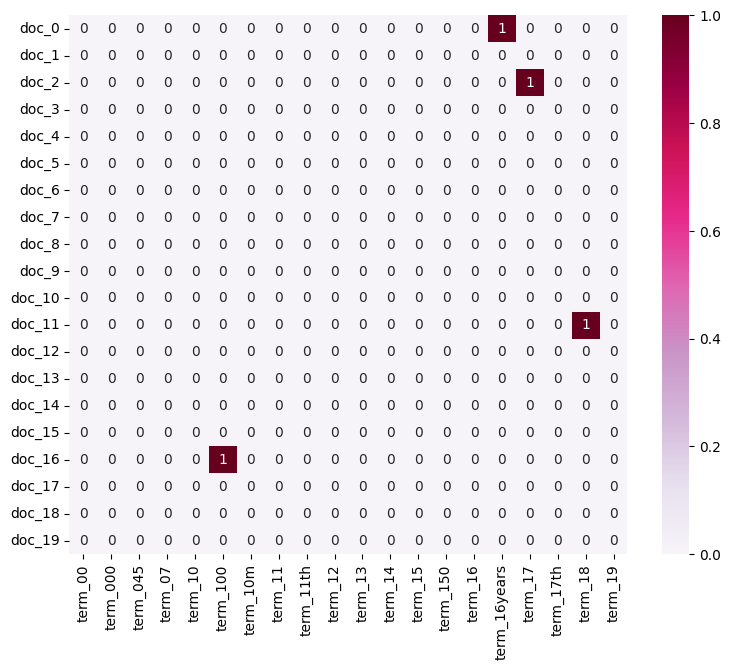

In [51]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 

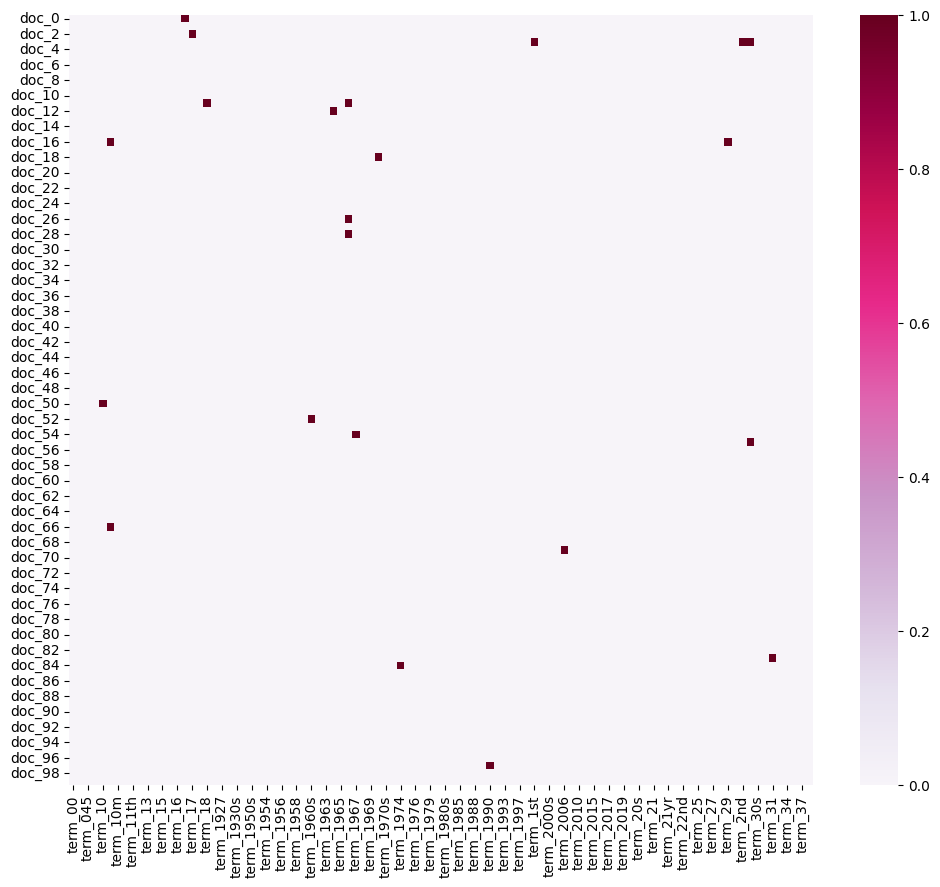

In [52]:
# Answer here
# Sample 100 documents and 100 terms
plot_z = X_counts_youtube[0:100, 0:100].toarray()

# Create a larger heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]
plot_y = ["doc_"+ str(i) for i in list(df_youtube.index)[0:100]]
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# Plot
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=False)
plt.show()

### 5.4 Attribute Transformation / Aggregation

In [53]:
# 
term_frequencies = []
for j in range(0, X_counts_youtube.shape[1]):
    term_frequencies.append(sum(X_counts_youtube[:,j].toarray()))

In [54]:
term_frequencies = np.asarray(X_counts_youtube.sum(axis=0))[0]

In [55]:
term_frequencies[0]

np.int64(1)

C:\Users\user\AppData\Local\Temp\ipykernel_24392\3140323867.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '045'),
 Text(3, 0, '07'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '10m'),
 Text(7, 0, '11'),
 Text(8, 0, '11th'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '150'),
 Text(14, 0, '16'),
 Text(15, 0, '16years'),
 Text(16, 0, '17'),
 Text(17, 0, '17th'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '1927'),
 Text(21, 0, '1930'),
 Text(22, 0, '1930s'),
 Text(23, 0, '1950'),
 Text(24, 0, '1950s'),
 Text(25, 0, '1952'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1960'),
 Text(32, 0, '1960s'),
 Text(33, 0, '1962'),
 Text(34, 0, '1963'),
 Text(35, 0, '1964'),
 Text(36, 0, '1965'),
 Text(37, 0, '1966'),
 Text(38, 0, '1967'),
 Text(39, 0, '1968'),
 Text(40, 0, '1969'),
 Text(41, 0, '1970'),
 Text(42, 0, '1970s'),
 Text(43, 0, '1973'),
 Text(44, 0, '1974'),
 Text(45, 0, '1975'),
 Text(46, 0, '1976')

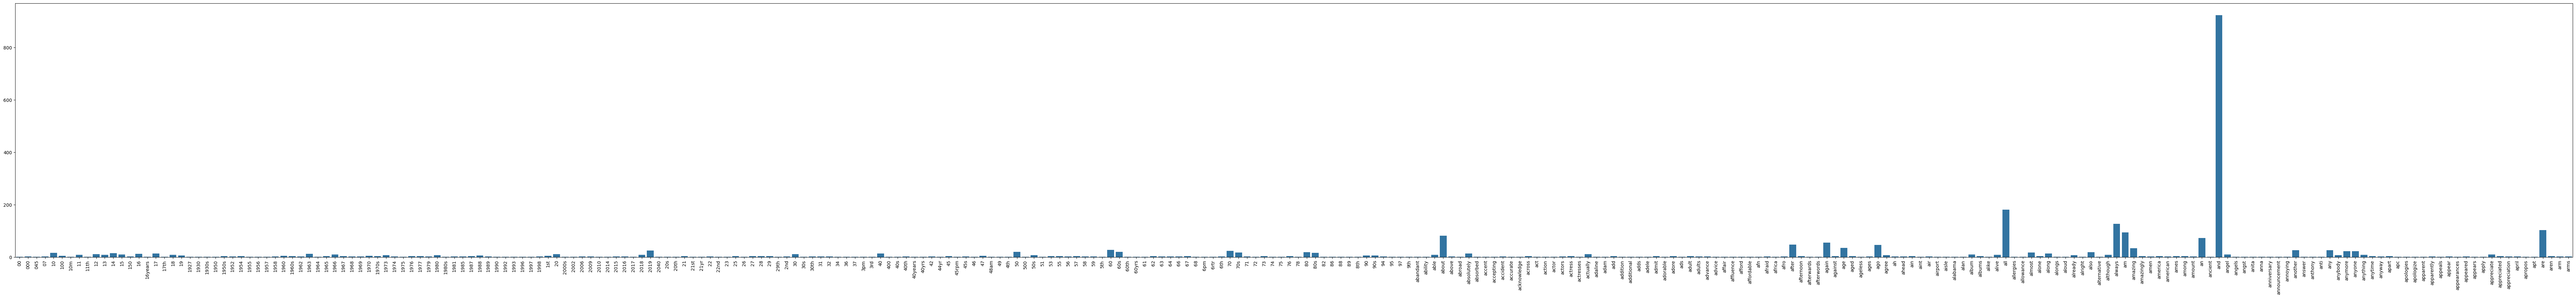

In [56]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### >>> **Exercise 12 (take home):**

In [57]:
# Answer here
import plotly.express as px
import pandas as pd

# Transform term frequencies into a DataFrame for plotting
df = pd.DataFrame({
    "Terms": count_vect.get_feature_names_out()[:300],  # First 300 terms
    "Frequencies": term_frequencies[:300]              # Corresponding frequencies
})

# Use Plotly to create a bar chart
fig = px.bar(df, x='Terms', y='Frequencies', title="Term Frequencies", labels={'Terms': 'Terms', 'Frequencies': 'Frequencies'})

# Rotate x-axis labels to avoid crowding
fig.update_layout(xaxis_tickangle=-90)

# Display the plot
fig.show()

### >>> **Exercise 13 (take home):** 

In [58]:
# Answer here
import numpy as np
import plotly.express as px
import pandas as pd

# Step 1: Calculate the total frequency of each term
term_frequencies = np.asarray(X_counts_youtube.sum(axis=0)).flatten()

# Step 2: Select the top 50 terms with the highest frequencies
top_n = 50
top_term_indices = term_frequencies.argsort()[-top_n:]  # Find the indices of the most frequent terms

# Step 3: Create a DataFrame to pair these terms with their frequencies
df = pd.DataFrame({
    "Terms": count_vect.get_feature_names_out()[top_term_indices],  # Top 50 terms
    "Frequencies": term_frequencies[top_term_indices]  # Corresponding frequencies
})

# Step 4: Use Plotly to create an interactive bar chart
fig = px.bar(df, x='Terms', y='Frequencies', title="Top 50 Term Frequencies", labels={'Terms': 'Terms', 'Frequencies': 'Frequencies'})

# Step 5: Rotate x-axis labels to avoid crowding
fig.update_layout(xaxis_tickangle=-90)

# Step 6: Display the plot
fig.show()

### >>> **Exercise 14 (take home):** 

In [59]:
# Answer here
import numpy as np
import plotly.express as px
import pandas as pd

# Step 1: Calculate the total frequency of each term
term_frequencies = np.asarray(X_counts_youtube.sum(axis=0)).flatten()

# Step 2: Sort the terms and their frequencies (in descending order)
sorted_indices = np.argsort(term_frequencies)[::-1]  # Sort the frequencies in descending order
sorted_frequencies = term_frequencies[sorted_indices]  # Get the frequencies according to the sorted indices
sorted_terms = count_vect.get_feature_names_out()[sorted_indices]  # Get the terms according to the sorted indices

# Step 3: Select the top 100 terms for visualization (sorted by frequency)
top_n = 100
df = pd.DataFrame({
    "Terms": sorted_terms[:top_n],  # Top 100 terms
    "Frequencies": sorted_frequencies[:top_n]  # Corresponding frequencies
})

# Step 4: Use Plotly to create a bar chart of the top 100 term frequencies
fig = px.bar(df, x='Terms', y='Frequencies', title="Top 100 Term Frequencies (Sorted by Frequency)", labels={'Terms': 'Terms', 'Frequencies': 'Frequencies'})

# Step 5: Rotate x-axis labels to avoid crowding
fig.update_layout(xaxis_tickangle=-90)

# Step 6: Display the plot
fig.show()

In [60]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\user\AppData\Local\Temp\ipykernel_24392\1516414146.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '045'),
 Text(3, 0, '07'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '10m'),
 Text(7, 0, '11'),
 Text(8, 0, '11th'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '150'),
 Text(14, 0, '16'),
 Text(15, 0, '16years'),
 Text(16, 0, '17'),
 Text(17, 0, '17th'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '1927'),
 Text(21, 0, '1930'),
 Text(22, 0, '1930s'),
 Text(23, 0, '1950'),
 Text(24, 0, '1950s'),
 Text(25, 0, '1952'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1960'),
 Text(32, 0, '1960s'),
 Text(33, 0, '1962'),
 Text(34, 0, '1963'),
 Text(35, 0, '1964'),
 Text(36, 0, '1965'),
 Text(37, 0, '1966'),
 Text(38, 0, '1967'),
 Text(39, 0, '1968'),
 Text(40, 0, '1969'),
 Text(41, 0, '1970'),
 Text(42, 0, '1970s'),
 Text(43, 0, '1973'),
 Text(44, 0, '1974'),
 Text(45, 0, '1975'),
 Text(46, 0, '1976')

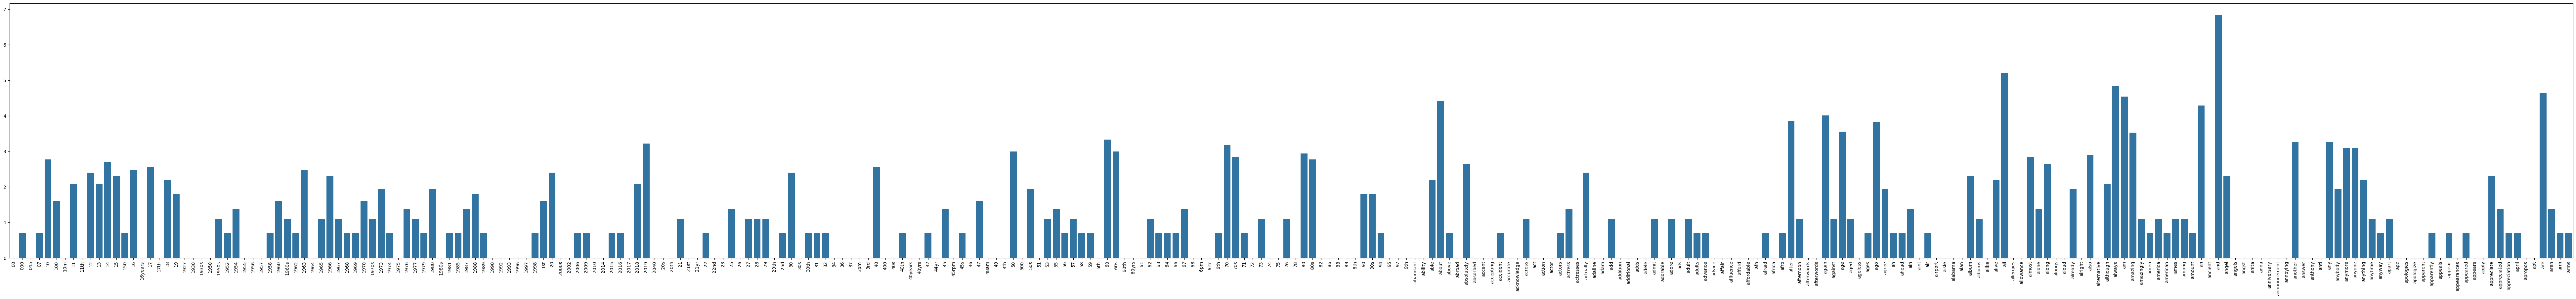

In [61]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### >>> **Exercise 15 (take home):** 

In [62]:
# Answer here
import numpy as np
import plotly.express as px
import pandas as pd

# Step 1: Calculate the total frequency of each term
term_frequencies = np.asarray(X_counts_youtube.sum(axis=0)).flatten()

# Step 2: Take the logarithm of term frequencies to avoid log(0) issues
term_frequencies_log = np.log1p(term_frequencies)  # log(1+x) is used to avoid log(0)

# Step 3: Sort the terms by frequency
sorted_indices = np.argsort(term_frequencies_log)[::-1]  # Sort the frequencies in descending order
sorted_frequencies_log = term_frequencies_log[sorted_indices]
sorted_terms = count_vect.get_feature_names_out()[sorted_indices]

# Step 4: Select the top 100 terms for visualization (sorted by log frequency)
top_n = 100
df_log = pd.DataFrame({
    "Terms": sorted_terms[:top_n],
    "Log Frequencies": sorted_frequencies_log[:top_n]
})

# Step 5: Use Plotly to create a bar chart of the top 100 term log frequencies
fig_log = px.bar(df_log, x='Terms', y='Log Frequencies', title="Top 100 Term Log Frequencies (Sorted by Log Frequency)", labels={'Terms': 'Terms', 'Log Frequencies': 'Log Frequencies'})

# Step 6: Rotate x-axis labels to avoid crowding
fig_log.update_layout(xaxis_tickangle=-90)

# Step 7: 
fig_log.show()


# Logarithmic distribution of term frequencies vs. original term frequencies
# Original woed frequencies distrubution shows the actual woed frequencies in the text data. 
# Words that appear more frequently occupy the left side of the graph, while words with low frequencies are almost unnoticeable in the picture.
# Logarithmic distribution of term frequencies shows the logarithmic transformation of the original term frequencies. 
# The logarithmic transformation makes the distribution more evenly distributed, making it easier to observe the differences in term frequencies.

###  Finding frequent patterns
Perfect, so now that we know how to interpret a document-term matrix from our text data, we will see how to get extra insight from it, we will do this by mining frequent patterns. For this we will be using the PAMI library that we previously installed.

In [76]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df_youtube['sentiment_label'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df_youtube[df_youtube['sentiment_label'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])


In [77]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number = 0 # You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


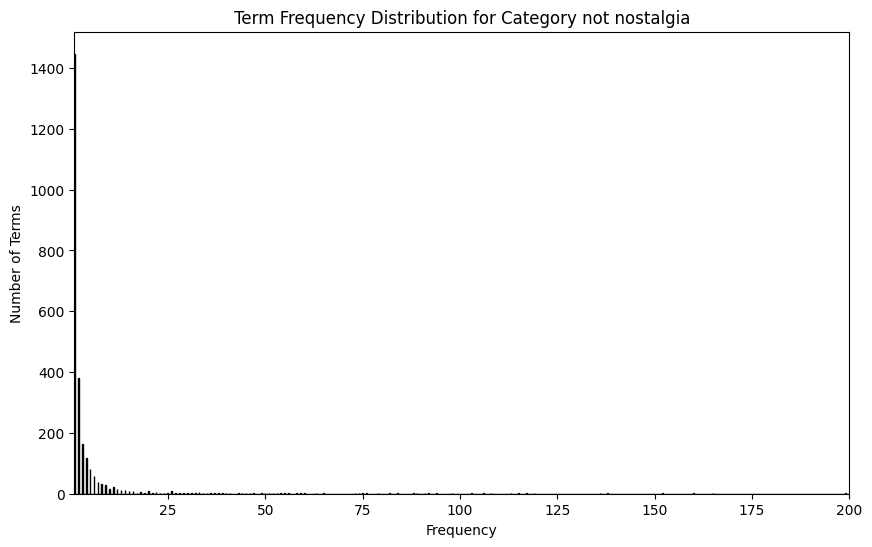

In [78]:
 # Sum over all documents to get total frequency for each word
category_number = 0 # You can change it from 0 to 1
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [79]:
category_number = 0 # You can change it from 0 to 1
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Sort indices in descending order
sorted_counts = word_counts[sorted_indices]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index] # Get the top 5% indices

# Filter terms that belong to the top 5% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['nearly', 'news', '94', 'not', 'headphones', 'match', 'faithful', 'fairground', 'everytime', 'pull', 'nearest', 'had', 'fry', 'gun', 'pity', 'decades', 'marin', 'eagle', 'hearts', 'focus', 'baritone', 'earnings', 'presented', 'doubt', '68', 'poor', 'hats', 'hearted', 'an', 'phoenix', 'battle', 'ginnie', 'featured', 'announcement', 'matched', 'afford', 'eh', 'nor', 'looks', 'predict', 'nerve', 'pops', 'depressing', 'embedded', 'adam', 'afterwords', 'does', '76', 'hardin', 'happens', 'fifty', 'hd', 'gucci', '27', 'posting', 'jensen', 'establishment', 'greeted', 'platform', 'appearances', 'barman', 'contemporaries', 'nc', 'problem', 'never', 'microphones', 'entertainer', 'heaven', 'chock', 'dylan', 'penny', 'neighborhood', '78', 'here', 'nelson', 'elvis', 'brilliantly', '90', 'hears', 'part', 'fore', 'ease', 'cherish', 'lyrics', 'drive', 'gen', 'either', 'moment', 'note', 'nowadays', 'peaceful', 'anybody', 'pure', 'ea

In [80]:
category_number = 0 # You can change it from 0 to 1
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index] # Get the bottom 1% indices

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['1960', '1960s', '1963', '1964', '1966', '1967', 'prodigy', 'produced', '2002', '2009', '1930', '1930s', '1952', '1954', '1955', '1958', '1990', '1992', '1993', '1996', '1998', '1st', '20', '2000s', '1970', '1970s']


### >>> **Exercise 16 (take home):** 

In [81]:
import numpy as np
import pandas as pd
import plotly.express as px

# Function to filter the top 5% and bottom 1% words based on their frequency in the term-document matrix
def filter_top_bottom_words(term_document_df, count_vect, top_percent=0.05, bottom_percent=0.01):
    word_counts = term_document_df.sum(axis=0).to_numpy()  # Sum the frequency of each word across all documents
    sorted_indices = np.argsort(word_counts)  # Get the indices of sorted word frequencies in ascending order
    sorted_counts = word_counts[sorted_indices]  # Sort the word frequencies based on the indices
    
    total_terms = len(sorted_counts)  # Total number of unique terms (vocabulary size)
    
    # Calculate the indices for the top 5% and bottom 1% of word frequencies
    top_5_percent_index = int(top_percent * total_terms)
    bottom_1_percent_index = int(bottom_percent * total_terms)
    
    # Get the indices of the top 5% and bottom 1% words
    top_5_percent_indices = sorted_indices[-top_5_percent_index:]  # Last top 5% words
    bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]  # First bottom 1% words
    
    # Combine the top and bottom indices
    filtered_indices = np.concatenate([top_5_percent_indices, bottom_1_percent_indices])
    
    # Retrieve the words corresponding to the filtered indices using CountVectorizer's vocabulary
    filtered_words = [count_vect.get_feature_names_out()[i] for i in filtered_indices]
    
    # Retrieve the corresponding frequencies of the filtered words
    filtered_frequencies = word_counts[filtered_indices]
    
    # Create a DataFrame with the filtered words and their frequencies
    df_filtered_words = pd.DataFrame({
        'Term': filtered_words,
        'Frequency': filtered_frequencies
    })
    
    # Sort the DataFrame by word frequencies in descending order for better visualization
    df_filtered_words = df_filtered_words.sort_values(by='Frequency', ascending=False)
    
    return df_filtered_words

# Assuming count_vect and term_document_dfs are already initialized
for category in categories:
    print(f"\nCategory: {category}")
    
    # Filter the top 5% and bottom 1% terms for the given category
    df_filtered_words = filter_top_bottom_words(term_document_dfs[category], count_vect)
    
    # Create a bar chart to visualize the filtered terms and their frequencies
    fig = px.bar(df_filtered_words, x='Term', y='Frequency', title=f"Top 5% and Bottom 1% Term Frequencies for Category {category}")
    
    # Display the plot
    fig.show()


Category: not nostalgia



Category: nostalgia


In [82]:
filtered_words_by_category = {}

# Loop through each category and store the filtered words for review
for category in categories:
    print(f"\nCategory: {category}")
    
    # Filter the top 5% and bottom 1% terms for the given category
    df_filtered_words = filter_top_bottom_words(term_document_dfs[category], count_vect)
    
    # Store the filtered words for the category
    filtered_words_by_category[category] = df_filtered_words['Term'].tolist()
    
    # Display the filtered words for each category
    print(f"Filtered words for Category {category}:")
    print(filtered_words_by_category[category])


Category: not nostalgia
Filtered words for Category not nostalgia:
['nearly', 'news', '94', 'not', 'headphones', 'match', 'faithful', 'fairground', 'everytime', 'pull', 'nearest', 'had', 'fry', 'gun', 'pity', 'decades', 'marin', 'eagle', 'hearts', 'focus', 'baritone', 'earnings', 'presented', 'doubt', '68', 'poor', 'hearted', 'hats', 'an', 'battle', 'phoenix', 'ginnie', 'featured', 'afford', 'matched', 'announcement', 'nor', 'eh', 'looks', 'predict', 'nerve', 'pops', 'depressing', 'embedded', 'adam', 'afterwords', 'does', '76', 'hardin', 'happens', 'fifty', 'hd', 'gucci', '27', 'posting', 'jensen', 'greeted', 'platform', 'establishment', 'appearances', 'barman', 'contemporaries', 'problem', 'nc', 'never', 'chock', 'entertainer', 'heaven', 'microphones', 'penny', 'dylan', '78', 'neighborhood', 'here', 'nelson', 'elvis', 'brilliantly', 'part', '90', 'hears', 'cherish', 'fore', 'ease', 'lyrics', 'gen', 'drive', 'either', 'peaceful', 'note', 'nowadays', 'moment', 'anybody', 'pure', 'easil

In [84]:
print("Available categories:", filtered_words_by_category.keys())

Available categories: dict_keys(['not nostalgia', 'nostalgia'])


In [85]:
# Function to compare filtered words between two categories
def compare_words(category1, category2):
    set1 = set(filtered_words_by_category[category1])
    set2 = set(filtered_words_by_category[category2])
    
    # Find common words
    common_words = set1.intersection(set2)
    
    # Find unique words for each category
    unique_to_category1 = set1 - set2
    unique_to_category2 = set2 - set1
    
    # Print the comparisons
    print(f"\nCommon words between Category {category1} and Category {category2}:")
    print(list(common_words))
    
    print(f"\nWords unique to Category {category1}:")
    print(list(unique_to_category1))
    
    print(f"\nWords unique to Category {category2}:")
    print(list(unique_to_category2))

# Compare the words between category 'not nostalgia'  and category 'nostalgia'
compare_words('not nostalgia', 'nostalgia')


Common words between Category not nostalgia and Category nostalgia:
['doubt', 'hearts', '1960', 'nerve', '1966', 'barman', '90', '78', '1930s', 'baritone', '1954', 'nearest', 'divorce']

Words unique to Category not nostalgia:
['brilliantly', 'contemporaries', 'lyrics', 'embedded', '1993', 'forget', 'peaceful', 'praise', '1952', '1st', 'machine', 'hood', 'drive', 'gun', 'plane', '1955', '20', 'held', 'difficult', '1996', '1990', '80', 'apply', 'focus', 'faithful', 'happiness', 'adam', 'pure', 'nc', 'happens', 'hears', 'princilla', 'matched', 'hats', 'posting', 'either', 'afford', 'afterwords', 'eagle', 'hardin', 'navy', 'captivating', '2009', 'fifty', 'gucci', 'never', 'presence', 'appearances', 'had', 'entertainer', '68', 'marin', 'fall', '1970s', 'fairground', 'earnings', 'looks', '27', 'note', 'japan', 'decades', 'an', 'perfection', 'nearly', 'darlington', 'lyric', 'pull', 'dylan', 'poor', 'pops', 'microphones', 'nicely', 'nowadays', 'news', 'jensen', 'here', 'depressing', 'century

**Common Vocabulary (Shared words between Category 0 and Category 1):**

Examples of common words: 1966, 1960, 1954, 1930s, divorce, doubt

- **Time and History**: Multiple years appear, such as 1960, 1966, 1954, and the 1930s, which may be related to memories, reflecting nostalgic emotions across different decades. Both categories mention these.
- **Emotional Vocabulary**: Words like "divorce," "doubt," and "hearts" express certain emotional states, potentially indicating that both categories involve some negative or complex emotional expressions.

---

**Category 0 (Unique Words):**

Examples of words: cherish, protest, lyrics, memory, gas, pure, Elvis, machine

- **Nostalgia and Emotions**: Words like "cherish," "lyrics," and "memory" convey strong nostalgic feelings, particularly emphasizing music, lyrics, and past memories. This aligns with the theme of "nostalgia."
- **Society and History**: Words such as "protest," "gas," and "machine" may reflect elements related to past historical events, social changes, or the Industrial Revolution. These words could be associated with specific memories or contexts.

---

**Category 1 (Unique Words):**

Examples of words: love, Facebook, feelings, musician, documentary, graduation, credit

- **Modern Elements**: Words like "Facebook," "graduation," and "credit" reflect more modern elements, possibly indicating that these words are related to contemporary life events or emotional expressions more associated with the "non-nostalgic" category.
- **Emotions and Music**: Words like "love," "feelings," "musician," and "documentary" show more personal emotional and music-related terms, though these seem to lean towards more contemporary or specific emotions rather than purely nostalgic feelings.


In [86]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 750
Number of items : 2295
Minimum Transaction Size : 3
Average Transaction Size : 21.644
Maximum Transaction Size : 70
Standard Deviation Transaction Size : 13.110095245013795
Variance in Transaction Sizes : 172.1040694259012
Sparsity : 0.9905690631808279


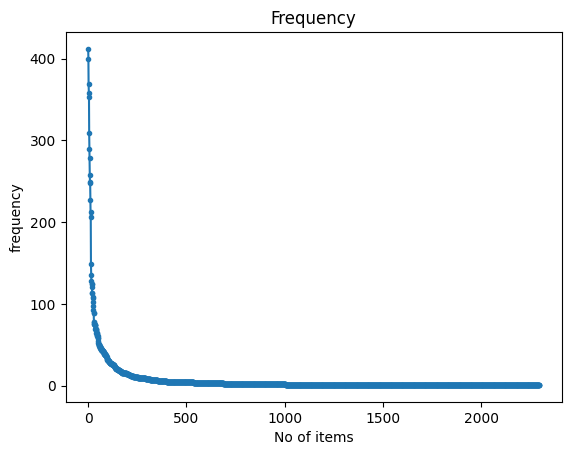

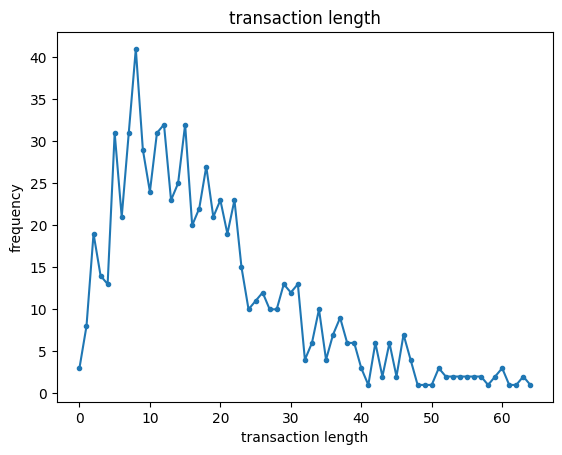

In [88]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 750
Number of items : 2602
Minimum Transaction Size : 4
Average Transaction Size : 20.036
Maximum Transaction Size : 71
Standard Deviation Transaction Size : 10.366743493820355
Variance in Transaction Sizes : 107.61285447263018
Sparsity : 0.9922997694081476


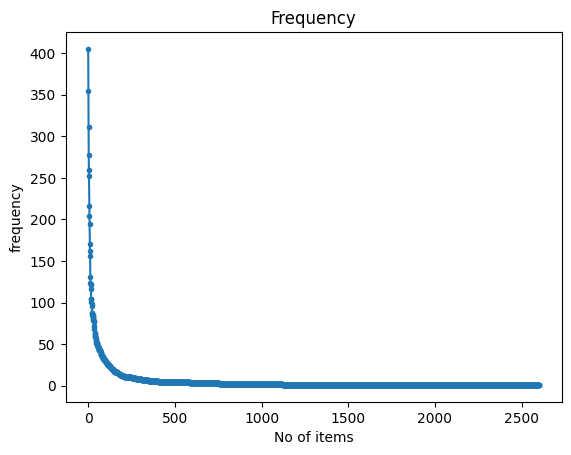

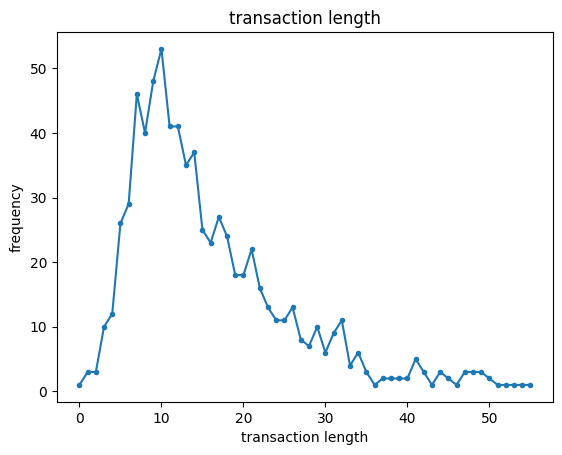

In [90]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [92]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 71737
Runtime: 0.9242222309112549


In [93]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
71732,the my this,123
71733,the this,212
71734,my,400
71735,my this,252


In [94]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 9704
Runtime: 0.19499850273132324


In [95]:
obj2.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
...,...,...
9699,and this the,87
9700,and the,179
9701,this,355
9702,this the,184


In [96]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                     Patterns  Support
66058                memories      227
68307                   to my      227
68311                the this      212
68302                 song my      212
68309                  the my      192
...                       ...      ...
55096        on so it to this        9
55097    was on so it to this        9
55100      on so it song this        9
55101  was on so it song this        9
55102        on so it song to        9

[74591 rows x 2 columns]
Number of patterns discarded: 6850


In [98]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'comment' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_youtube_tdm = count_vect.fit_transform(df_youtube['comment'])  # df_youtube['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df_youtube['tokenized_comment'] = df_youtube['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df_youtube.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df_youtube['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_youtube_tdm.toarray(), columns=terms, index=df_youtube.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,on so song the my,on so song to my this,on so it my this,on so it the in,was on so it the in,on so it to this,was on so it to this,on so it song this,was on so it song this,on so it song to
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
from PAMI.frequentPattern.topk import FAE as alg
import pandas as pd

# Set input parameters
inputFile = 'td_freq_db_nostalgia.csv'  # Path to the transactional database file for nostalgia category
separator = ','  # Set the separator (based on file format)
klist = [500, 1000, 1500]  # Different values of k

# Initialize a DataFrame to store results from the FAE algorithm
result = pd.DataFrame(columns=['algorithm', 'k', 'patterns', 'runtime', 'memory'])

# Loop over different values of k to run the algorithm
for kCount in klist:
    obj = alg.FAE(inputFile, k=kCount, sep=separator)  # Initialize FAE with specified k
    obj.mine()  # Run the mining algorithm to extract frequent patterns
    # Store the results in the DataFrame
    result.loc[result.shape[0]] = ['FAE', kCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

# Print the final results
print("Top-K frequent patterns were successfully generated using the FAE algorithm.")
print(result)

 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
Top-K frequent patterns were successfully generated using the FAE algorithm.
  algorithm     k  patterns   runtime      memory
0       FAE   500       500  0.022597  2362785792
1       FAE  1000       750  0.048007  2362777600
2       FAE  1500       750  0.048002  2362802176


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
     algorithm  minSup  patterns   runtime      memory
0  MaxFPGrowth       3         0  0.002995  2370150400
1  MaxFPGrowth       6         0  0.001996  2370125824
2  MaxFPGrowth       9         0  0.001999  2370093056


Text(0.5, 1.0, 'Memory Usage vs minSup')

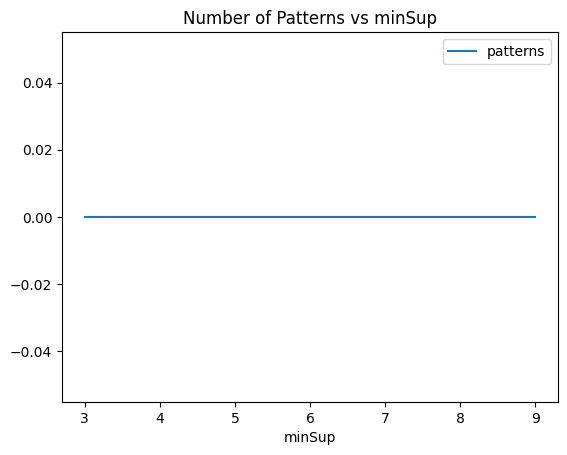

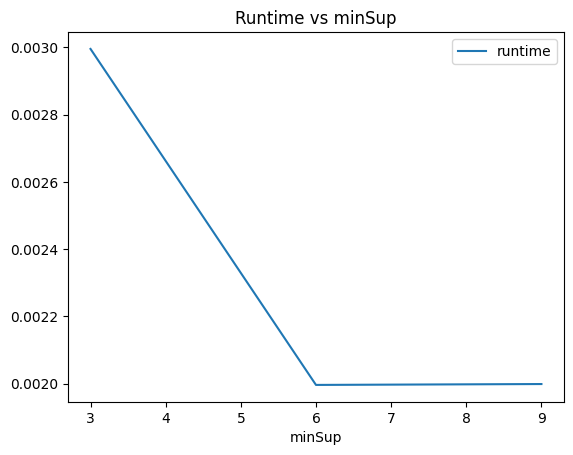

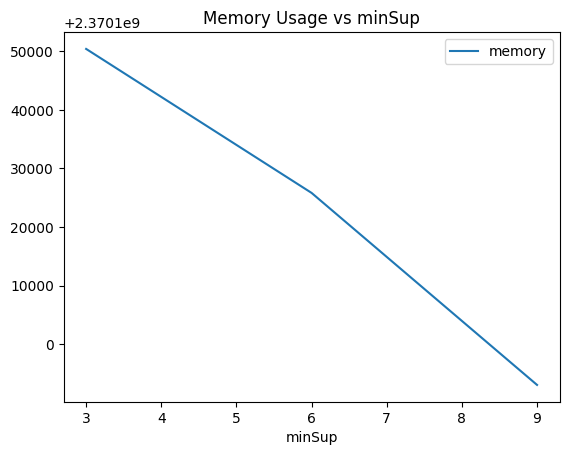

In [103]:
# Import MaxFPGrowth module
from PAMI.frequentPattern.maximal.MaxFPGrowth import MaxFPGrowth as alg
import pandas as pd

# Set input parameters
inputFile = 'td_freq_db_nostalgia.csv'  # Path to the processed nostalgia category database file
separator = ','  # Separator used in the CSV file
minimumSupportCountList = [3, 6, 9]  # List of different minimum support thresholds

# Initialize a DataFrame to store results from the MaxFPGrowth algorithm
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])

# Run the algorithm with different minSup values
for minSupCount in minimumSupportCountList:
    # Initialize MaxFPGrowth object
    obj = alg(inputFile, minSup=minSupCount, sep=separator)
    obj.mine()  # Run the mining algorithm to extract frequent itemsets
    
    # Store the results in the DataFrame
    result.loc[result.shape[0]] = ['MaxFPGrowth', minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

# Print the results
print(result)

# Visualize the relationship between minSup and the number of patterns, runtime, and memory usage
ax = result.plot(x='minSup', y='patterns', kind='line')
ax.set_title('Number of Patterns vs minSup')

ax = result.plot(x='minSup', y='runtime', kind='line')
ax.set_title('Runtime vs minSup')

ax = result.plot(x='minSup', y='memory', kind='line')
ax.set_title('Memory Usage vs minSup')

In [104]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
df_youtube_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
df_youtube_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
df_youtube_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [105]:
tdm_df.shape

(1500, 3730)

In [106]:
df_youtube_pca_tdm.shape

(1500, 2)

In [107]:
df_youtube_tsne_tdm.shape

(1500, 2)

In [108]:
df_youtube_umap_tdm.shape

(1500, 2)

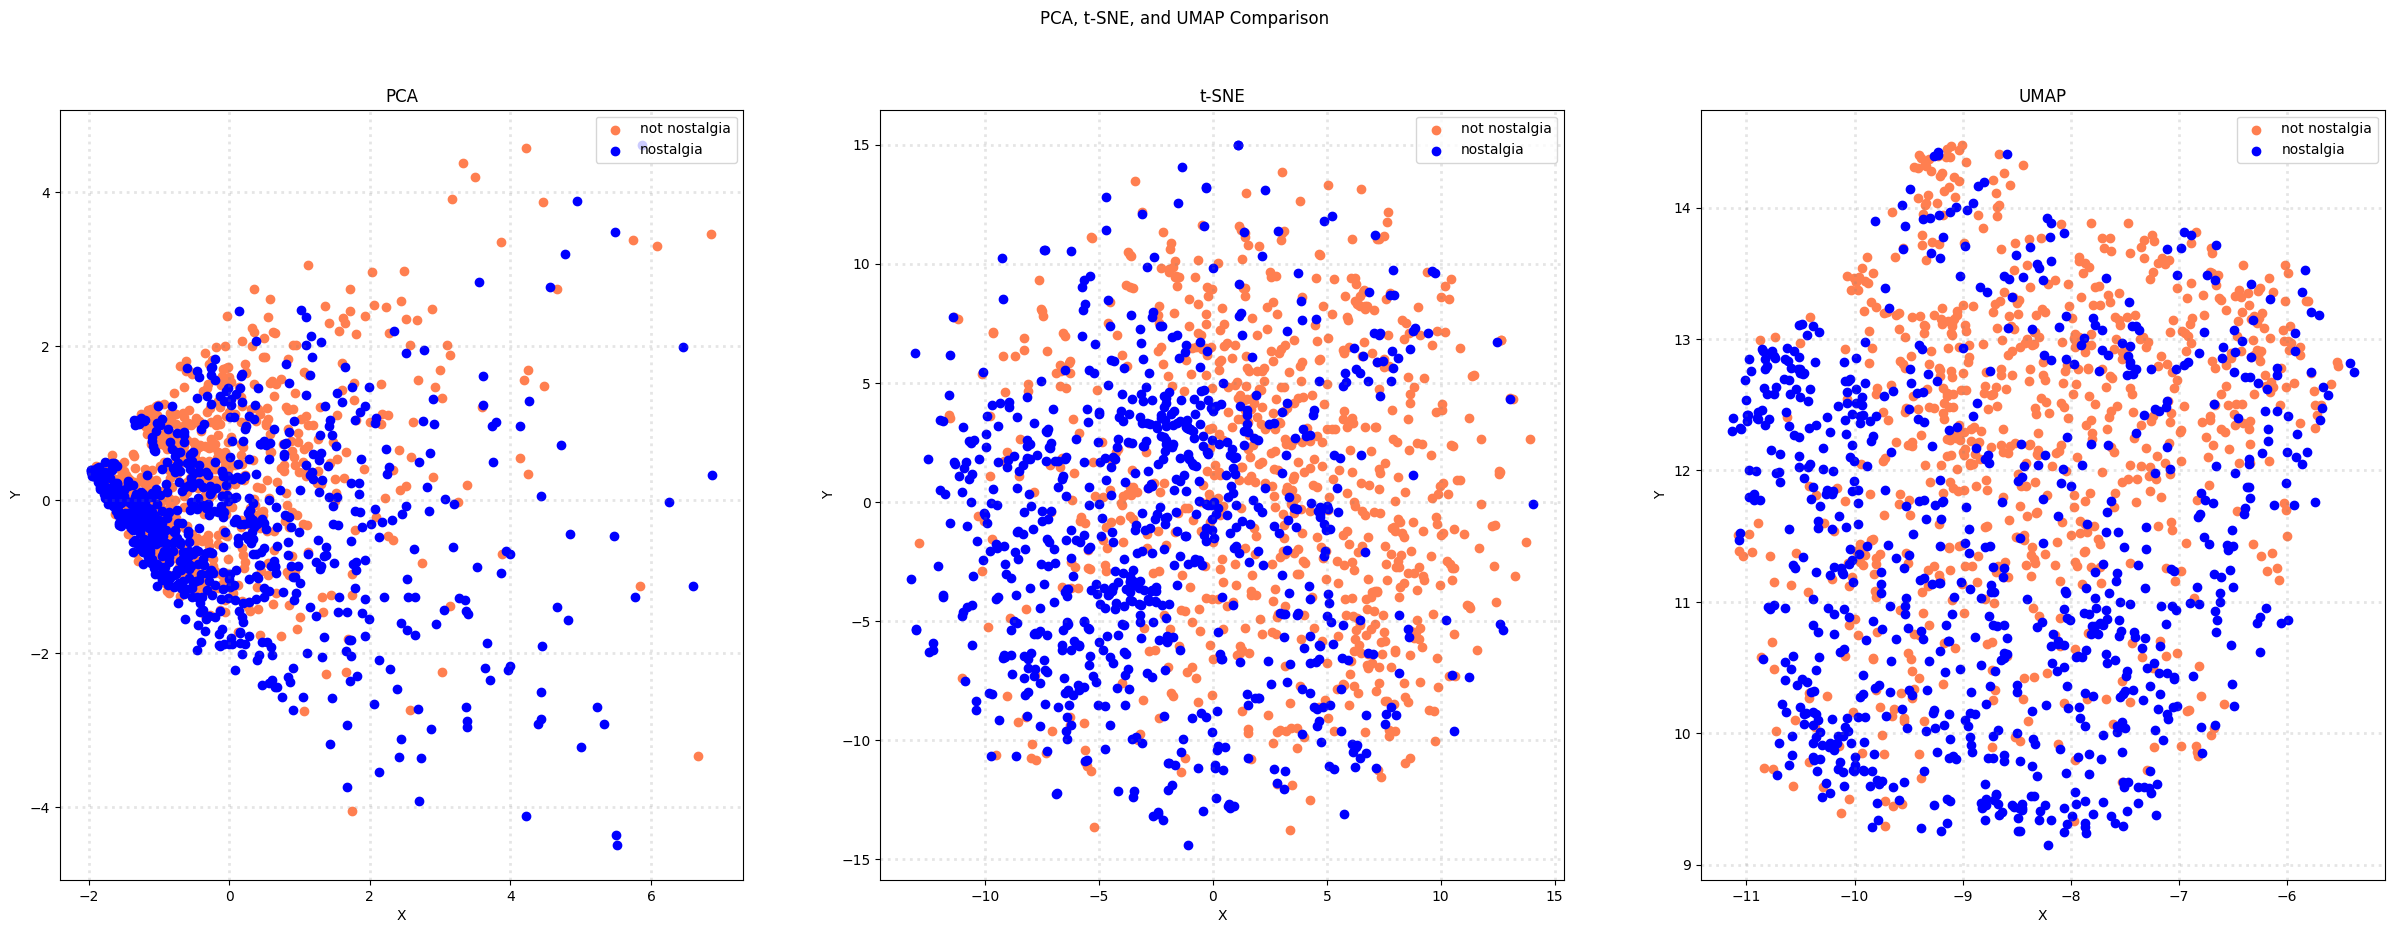

In [110]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df_youtube['sentiment_label'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, df_youtube_reduced, title):
    for c, category in zip(col, categories):
        xs = df_youtube_reduced[df_youtube['sentiment_label'] == category].T[0]
        ys = df_youtube_reduced[df_youtube['sentiment_label'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_youtube_pca_tdm, 'PCA')
plot_scatter(axes[1], df_youtube_tsne_tdm, 't-SNE')
plot_scatter(axes[2], df_youtube_umap_tdm, 'UMAP')

plt.show()

In [111]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
df_youtube_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
df_youtube_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
df_youtube_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

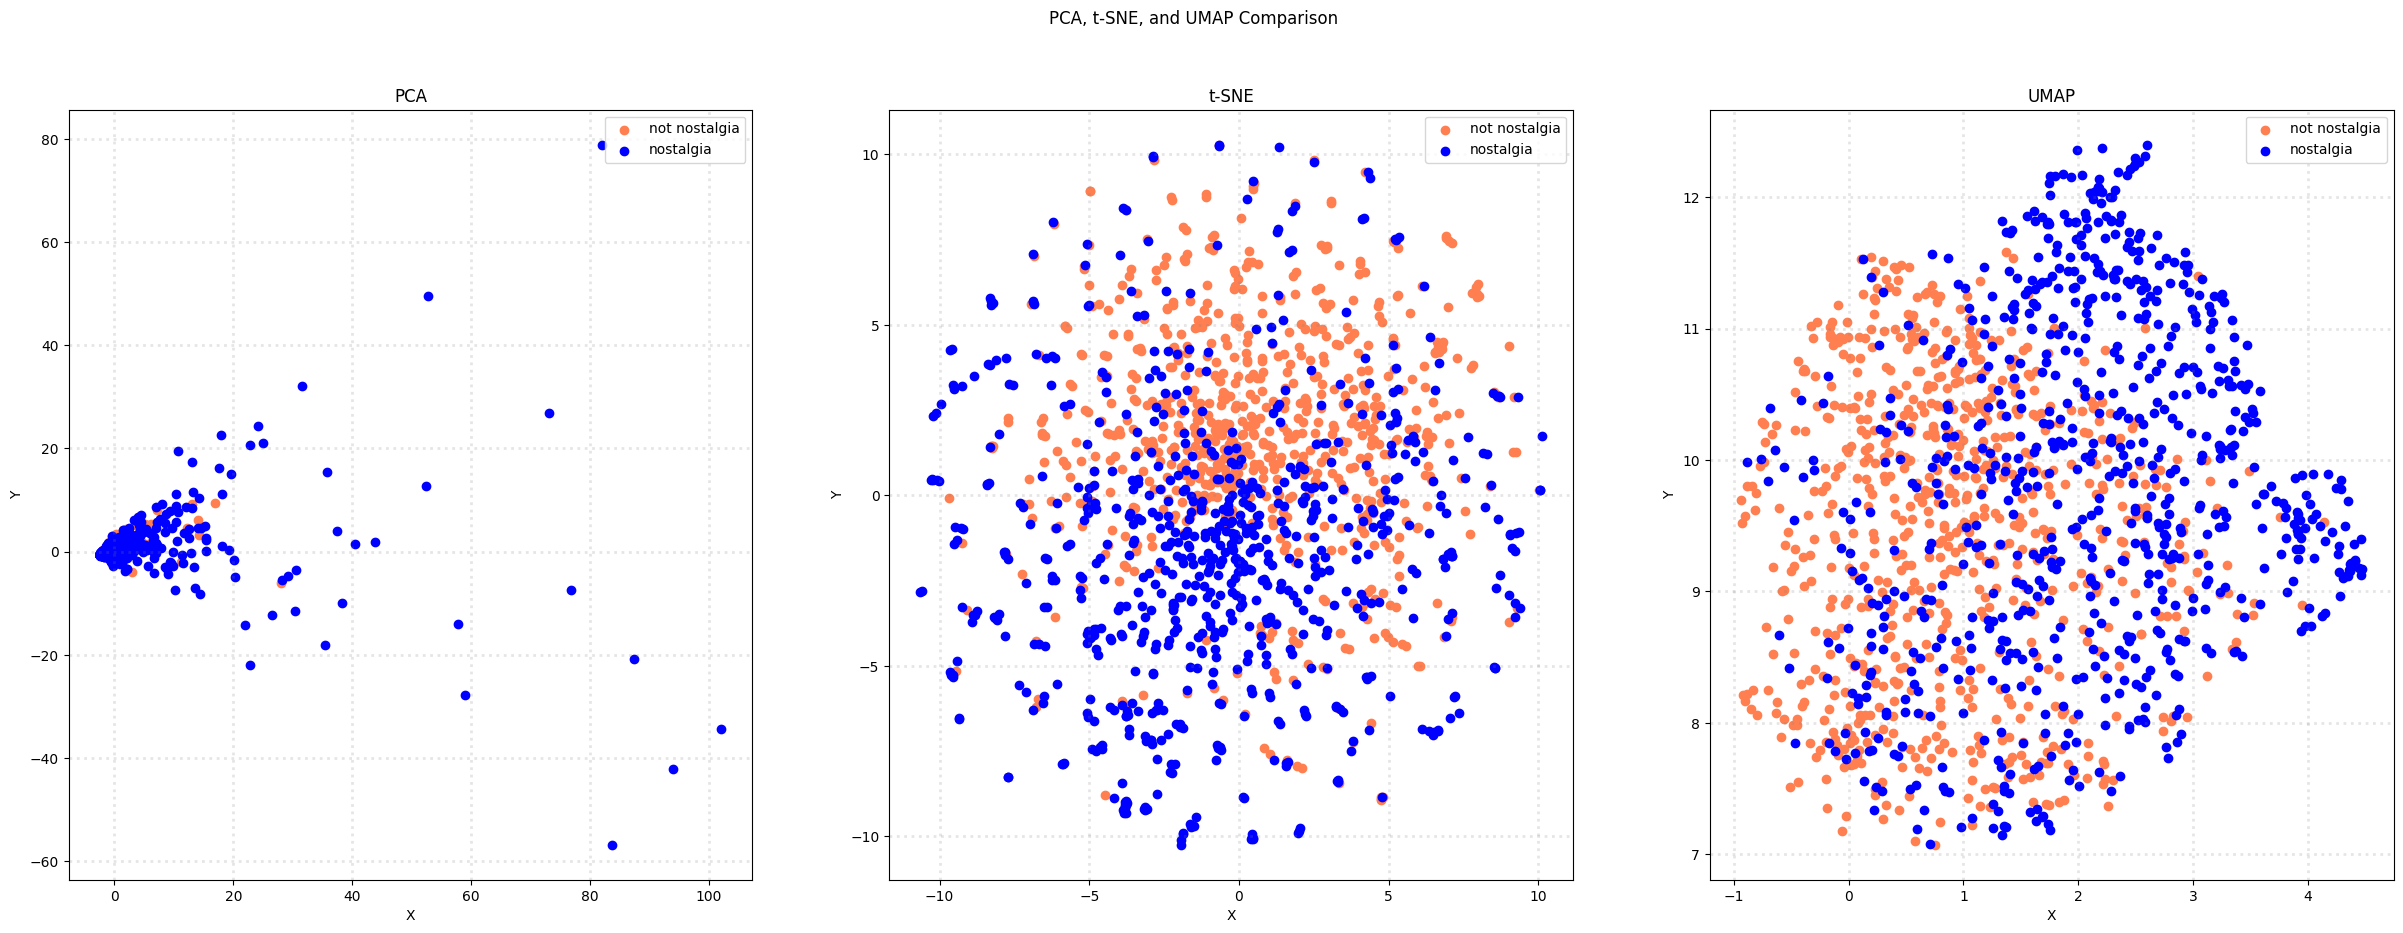

In [114]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df_youtube['sentiment_label'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, df_youtube_reduced, title):
    for c, category in zip(col, categories):
        xs = df_youtube_reduced[df_youtube['sentiment_label'] == category].T[0]
        ys = df_youtube_reduced[df_youtube['sentiment_label'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_youtube_pca_aug, 'PCA')
plot_scatter(axes[1], df_youtube_tsne_aug, 't-SNE')
plot_scatter(axes[2], df_youtube_umap_aug, 'UMAP')

plt.show()

### >>> Exercise 18 (take home):

IndexError: index 2 is out of bounds for axis 1 with size 2

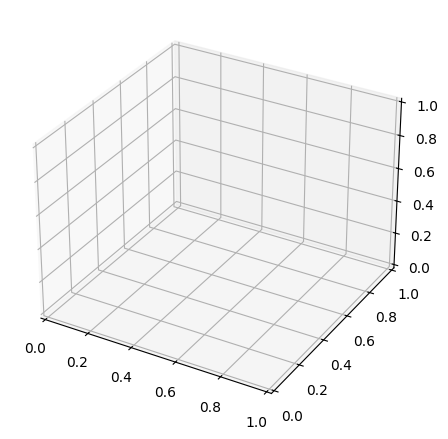

In [115]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Apply PCA, t-SNE, and UMAP with n_components=3
X_pca_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

# Define the category labels for coloring the scatter plots
categories = df_youtube['sentiment_label'].unique()

# Create a function for 3D plotting
def plot_3d_scatter(ax, df_youtube_reduced, title, elev, azim):
    for c, category in enumerate(categories):
        xs = df_youtube_reduced[df_youtube['sentiment_label'] == category, 0]
        ys = df_youtube_reduced[df_youtube['sentiment_label'] == category, 1]
        zs = df_youtube_reduced[df_youtube['sentiment_label'] == category, 2]
        ax.scatter(xs, ys, zs, label=category)

    ax.view_init(elev=elev, azim=azim)  # Set camera position
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

# Plot results with different angles
fig = plt.figure(figsize=(18, 6))

# PCA
ax = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax, df_youtube_pca_tdm, 'PCA', elev=20, azim=60)

# t-SNE
ax = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax, df_youtube_tsne_tdm, 't-SNE', elev=30, azim=120)

# UMAP
ax = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax, df_youtube_umap_tdm, 'UMAP', elev=45, azim=180)

plt.suptitle('3D Comparison of PCA, t-SNE, and UMAP')
plt.show()


In [116]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [130]:
mlb = preprocessing.LabelBinarizer()

In [131]:
mlb.fit(df_youtube['sentiment_label'])

LabelBinarizer()

In [132]:
df_youtube['bin_category'] = mlb.transform(df_youtube['sentiment_label']).tolist()

In [133]:
df_youtube[0:9]

,comment,sentiment_numeric,sentiment_label,unigrams,tokenized_comment,bin_category
0,He was a singer with a golden voice that I lov...,0,not nostalgia,"[He, was, a, singer, with, a, golden, voice, t...","{love, all, now., golden, 16years, that, have,...",[1]
1,The mist beautiful voice ever I listened to hi...,1,nostalgia,"[The, mist, beautiful, voice, ever, I, listene...","{love, singing, angel, kid, his, and, forgotte...",[0]
2,I have most of Mr. Reeves songs. Always love ...,1,nostalgia,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{pretensions, love, were, leave, Jesus, have, ...",[0]
3,30 day leave from 1st tour in Viet Nam to conv...,0,not nostalgia,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{""marry, be, convince, receive., all, leave, b...",[1]
4,listening to his songs reminds me of my mum wh...,1,nostalgia,"[listening, to, his, songs, reminds, me, of, m...","{to, reminds, mum, listening, my, who, me, him...",[0]
5,"Every time I heard this song as a child, I use...",1,nostalgia,"[Every, time, I, heard, this, song, as, a, chi...","{that, fear, this, funerals., reminded, many, ...",[0]
6,"My dad loved listening to Jim Reeves, when I w...",1,nostalgia,"[My, dad, loved, listening, to, Jim, Reeves, ,...","{teenager, loved, how, for, the, didn't, but, ...",[0]
7,i HAVE ALSO LISTENED TO Jim Reeves since child...,1,nostalgia,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{love, music., comes, tunes, his, LISTENED, i,...",[0]
8,Wherever you are you always in my heart,0,not nostalgia,"[Wherever, you, are, you, always, in, my, heart]","{Wherever, are, heart, you, my, always, in}",[1]


# 6. Data Exploration

In [135]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df_youtube.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df_youtube.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df_youtube.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [136]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['My grandma really loved elvis ???s music .. so we played this song at her funeral .. everytime i listen to this Song there are so many memories in my head']
["My grandad listens this on a CD with me and I learned the words but sadly he passed away and we will miss and love him I lost him when I'm 11 I will always miss him:("]


In [137]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [138]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.124611
Cosine Similarity using count bw 1 and 3: 0.170251
Cosine Similarity using count bw 2 and 3: 0.121988
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_24392\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_24392\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_24392\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_24392\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

# 7. Data Classification

In [139]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df_youtube[['sentiment_numeric', 'sentiment_label']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
df_youtube_train, df_youtube_test, y_train, y_test = train_test_split(tdm_df, df_youtube['sentiment_numeric'], test_size=0.3, random_state=42)

In [140]:
df_youtube_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
df_youtube_test

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
1116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(df_youtube_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(df_youtube_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9140    0.7556    0.8273       225
    nostalgia     0.7917    0.9289    0.8548       225

     accuracy                         0.8422       450
    macro avg     0.8528    0.8422    0.8410       450
 weighted avg     0.8528    0.8422    0.8410       450



In [144]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df_youtube[['sentiment_numeric', 'sentiment_label']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
df_youtube_train, df_youtube_test, y_train, y_test = train_test_split(augmented_df, df_youtube['sentiment_numeric'], test_size=0.3, random_state=42)

In [145]:
df_youtube_train

,00,000,045,07,10,100,10m,11,11th,12,...,on so song the my,on so song to my this,on so it my this,on so it the in,was on so it the in,on so it to this,was on so it to this,on so it song this,was on so it song this,on so it song to
485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
df_youtube_test

,00,000,045,07,10,100,10m,11,11th,12,...,on so song the my,on so song to my this,on so it my this,on so it the in,was on so it the in,on so it to this,was on so it to this,on so it song this,was on so it song this,on so it song to
1116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(df_youtube_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(df_youtube_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.7955555555555556

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.7224    0.9600    0.8244       225
    nostalgia     0.9404    0.6311    0.7553       225

     accuracy                         0.7956       450
    macro avg     0.8314    0.7956    0.7899       450
 weighted avg     0.8314    0.7956    0.7899       450

